In [50]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.time import Time
from matplotlib import dates as mdates

In [51]:
# The out.res file is an ASCII file derived from tempo.lis and resid2.tmp outputs from tempo

# Function to extract the residuals for a given range of time (MJD)
def plot_res(mjd_1,mjd_2,f):
    f=open('out.res')
    year = []
    mjd = []
    freq = []
    pre_res_ph = []
    pre_res_us = []
    post_res_us = []
    res_er_ph = []
    res_er_us = []
    orb_ph = []
    for line in f:
        line = line.strip()
        columns = line.split()
        

        if float(columns[1]) > mjd_1 and float(columns[1]) < mjd_2:
            year.append(float(columns[0]))
            mjd.append(float(columns[1]))
            freq.append(float(columns[2]))
            pre_res_ph.append(float(columns[3]))
            pre_res_us.append(float(columns[4])) 
            post_res_us.append(float(columns[5]))  
            res_er_ph.append(float(columns[6]))  
            res_er_us.append(float(columns[7]))
            orb_ph.append(float(columns[8]))

    return year,mjd,post_res_us,res_er_us,orb_ph


## Creating secondary axes for the plots

In [52]:
# Orbital Phase to Mean Anomaly and vice-versa

def orb_phase_to_ma(orb_phase):
    return orb_phase * 360.

def ma_to_orb_phase(ma):
    return ma / 360.


# Residuals to Phase and Vice-versa

def residuals_to_phase(residuals):
    return residuals/5595.947418074102

def phase_to_residuals(phase):
    return phase * 5595.947418074102


# MJD to year and vice-versa

def mjd_to_year(mjds):
    t = Time(mjds, format="mjd")
    return t.to_value('datetime')

def year_to_mjd(year):
    t= Time( mdates.num2date(year), format="datetime")
    return t.to_value('mjd')

## Plotting the post-fit residuals with respect to MJD and orbital phase

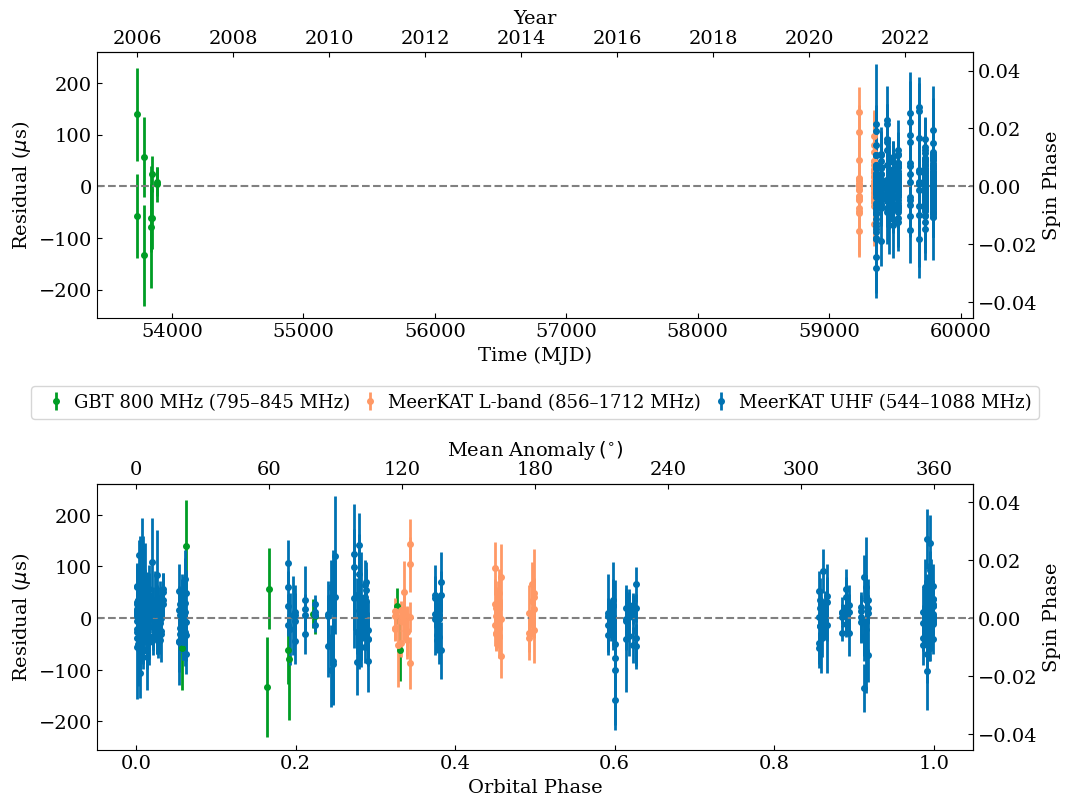

In [53]:
f=open('out.res')

fig, ax = plt.subplots(2,1, figsize=(12,10), sharey = 'row')
fig.tight_layout(pad = 7)
plt.style.use('default')


## Subplot 1: Residuals with orbital phase (and mean anomaly)
## Subplot 2: Residuals with MJD (and year)

params = {"font.size": 14,
         "font.family": 'serif',
         "font.weight": "normal",
         "xtick.labelsize" : 14,
         "ytick.labelsize" : 14,
         "xtick.direction": "in",
         "ytick.direction": "in",          
         }
plt.rcParams.update(params)


# Extracting earlier GBT data
year,mjd,post_res_us,res_er_us,orb_ph = plot_res(53730,53900,f)             
ax[0].errorbar(mjd,post_res_us,yerr=res_er_us,color='#009D25',fmt='.', 
               ms = 8, linewidth=2, label = 'GBT 800 MHz (795–845 MHz)')           
ax[1].errorbar(orb_ph,post_res_us,yerr=res_er_us,color='#009D25',fmt='.', 
               ms = 8, linewidth=2, label = 'GBT 800 MHz (795–845 MHz)')      


# Extracting MeerKAT L-Band data
year,mjd,post_res_us,res_er_us,orb_ph = plot_res(59200,59345,f)                    
ax[0].errorbar(mjd,post_res_us,yerr=res_er_us,color='#FF9966',fmt='.', 
               ms = 8, linewidth=2, label = 'MeerKAT L-band (856–1712 MHz)')       
ax[1].errorbar(orb_ph,post_res_us,yerr=res_er_us,color='#FF9966',fmt='.', 
               ms = 8, linewidth=2, label = 'MeerKAT L-band (856–1712 MHz)')  


# Extracting MeerKAT UHF data
year,mjd,post_res_us,res_er_us,orb_ph = plot_res(59350,59800,f)                    
ax[0].errorbar(mjd,post_res_us,yerr=res_er_us,color='#0072B2',fmt='.', 
               ms = 8, linewidth=2, label = 'MeerKAT UHF (544–1088 MHz)')         
ax[1].errorbar(orb_ph,post_res_us,yerr=res_er_us,color='#0072B2',fmt='.', 
               ms = 8, linewidth=2, label = 'MeerKAT UHF (544–1088 MHz)')     


# Plotting the secondary axes
ax1_year = ax[0].secondary_xaxis('top', functions=(mjd_to_year, year_to_mjd))
ax1_phase = ax[0].secondary_yaxis('right', functions=(residuals_to_phase, phase_to_residuals))

ax_year = ax[1].secondary_xaxis('top', functions=(orb_phase_to_ma, ma_to_orb_phase))
ax_phase = ax[1].secondary_yaxis('right', functions=(residuals_to_phase, phase_to_residuals))


ax[0].axhline(y=0.0,color = 'grey', ls = '--')
ax[1].axhline(y=0.0,color = 'grey', ls = '--')


# Labelling the axes
ax[0].set_xlabel('Time (MJD)')
ax[0].set_ylabel('Residual ($\mu$s)')

ax[1].set_xlabel('Orbital Phase')
ax[1].set_ylabel('Residual ($\mu$s)')

ax1_year.set_xlabel('Year')
ax1_phase.set_ylabel('Spin Phase')

tick_pos = np.linspace(0,360,7)
ax_year.set_xlabel('Mean Anomaly$\:(^{\circ})$')
ax_year.set_xticks(tick_pos)
ax_phase.set_ylabel('Spin Phase')



plt.legend(loc='upper center', fontsize = 13, bbox_to_anchor=(0.5, 1.4), 
           ncol=3, handletextpad = 0.0, columnspacing = 0.1, borderpad = 0.4, fancybox=True)



plt.show()

## Plotting the distribution of observations with Mean Anomaly and Months

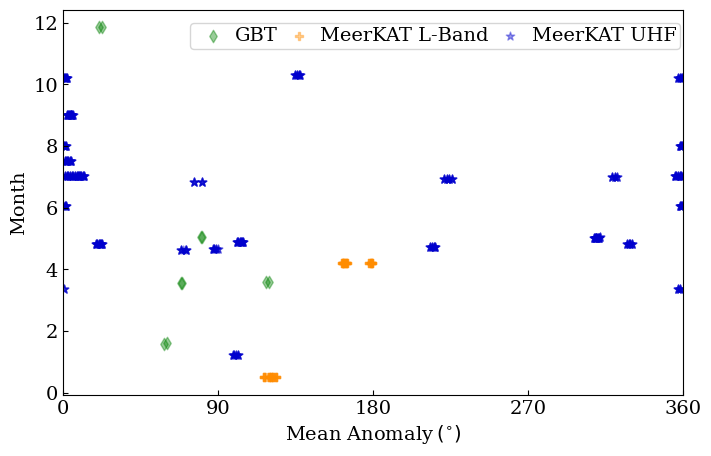

In [54]:
f=open('out.res')

fig,ax = plt.subplots(figsize=(8,5))
plt.style.use('default')


params = {"font.size": 14,
         "font.family": 'serif',
         "font.weight": "normal",
         "xtick.labelsize" : 14,
         "ytick.labelsize" : 14,
         "xtick.direction": "in",
         "ytick.direction": "in",          
         }
plt.rcParams.update(params)


## Plotting the month (~year) and mean anomaly (~orbital phase) for all the observations 

# Extracting information from earlier GBT data (2005-2006)
year,mjd,post_res_us,res_er_us,orb_ph = plot_res(53730,53900,f)           
month = []
for i in range(len(year)):
    if(year[i]<2006):
        month.append(12*(year[i]-2005))
    else:
        month.append(12*(year[i]-2006))
ma = []
for i in range(len(orb_ph)):
    ma.append(360.0*orb_ph[i])
plt.scatter(ma, month, marker ='d', s=40, alpha = 0.4, color='green', label = 'GBT')



# Extracting information from MeerKAT L-Band data (2021)
year,mjd,post_res_us,res_er_us,orb_ph = plot_res(59200,59345,f)            
month = []
for i in range(len(year)):
    month.append(12*(year[i]-2021))
ma = []
for i in range(len(orb_ph)):
    ma.append(360.0*orb_ph[i])
plt.scatter(ma, month, marker ='P', s=40, alpha = 0.4, color='darkorange', label = 'MeerKAT L-Band')


# Extracting information from MeerKAT UHF data (2021-2022)
year,mjd,post_res_us,res_er_us,orb_ph = plot_res(59350,59800,f)           
month = []
for i in range(len(year)):
    if(year[i]<2022):
        month.append(12*(year[i]-2021))
    else:
        month.append(12*(year[i]-2022))
ma = []
for i in range(len(orb_ph)):
    ma.append(360.0*orb_ph[i])
plt.scatter(ma, month, marker ='*', s=40, alpha = 0.4, color='mediumblue', label = 'MeerKAT UHF')


# Labelling the aces
plt.xlabel('Mean Anomaly$\:(^{\circ})$',fontsize=14)
plt.ylabel('Month',fontsize=14)

ticks = np.linspace(0,360,5)
ax.set_xticks(ticks)

plt.xlim(0.0,360.0)


legend_properties = {'weight':'bold'}
plt.legend(loc='upper center', fontsize = 14, bbox_to_anchor=(0.6, 0.99), 
           ncol=3, handletextpad = 0.1, columnspacing = 0.1, borderpad = 0.2, fancybox=True)


plt.show()